# data mining lab3

> Тема: Применение программных средств машинного обучения для обучения модели нейронной сети.

> Цель: Обучить выбранную модель нейронной сети с помощью программных средств машинного обучения

### 1. dataset

- Набор данных содержит `5000` изображений `20x20` в оттенках серого.
- Каждый пиксель представляет собой значение яркости (вещественное число).
- Каждое изображение сохранено в виде вектора из 400 элементов.
- В результате загрузки набора данных должна быть получена матрица `5000x400`.
- Далее расположены метки классов изображений от 1 до 9 (соответствуют цифрам от 1 до 9), а также 10 (соответствует цифре 0).

### 2. model

Будем решать задачу классификации с помощью нейросети следующей структуры:

> (input layer `400` nodes) -> (hidden layer `25` nodes) -> (output layer `10` nodes)

In [4]:
import numpy as np

import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
data = scipy.io.loadmat('data/digits.mat')

x = np.array(data['X'])
y = np.squeeze(data['y'])

np.place(y, y == 10, 0)
m, n = x.shape

num_labels = 10
input_layer_size = 400
hidden_layer_size = 25

print(f'x shape: {x.shape}\ny size:\t{y.size}')

x shape: (5000, 400)
y size:	5000


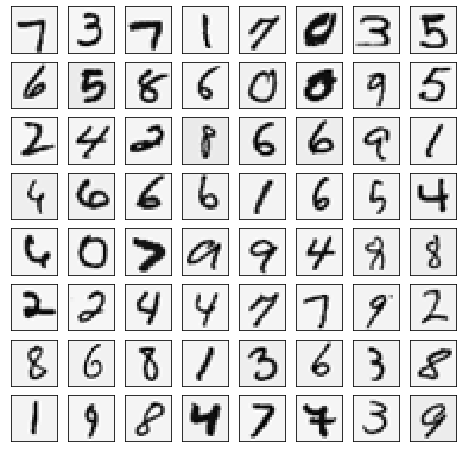

In [6]:
subplots = 64
draw_seed = np.random.randint(low=0, high=m, size=subplots)
draw_rows = x[draw_seed]
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    data = np.reshape(draw_rows[i], (20, 20), order='F')
    axi.imshow(data, cmap='binary')
    axi.set(xticks=[], yticks=[])

plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(25, activation='sigmoid', input_shape=(400,)))
model.add(Dense(10, activation='sigmoid'))

### 3. validation & train sets

> Разобьём исходные данные на выборки как `80/20`

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y = y.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False, categories='auto')
y_onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 400), (1000, 400), (4000, 10), (1000, 10))

### 4. setup & train

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                10025     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
Total params: 10,285
Trainable params: 10,285
Non-trainable params: 0
_________________________________________________________________


> Stochastic gradient descent optimizer.

Параметры обучения:
- `batch_size` - размер выборки данных которая используется для обновления весов за раз
- `epochs` - количество итераций
- красивый прогрессбар обучения с помощью `TQDMNotebookCallback`

In [11]:
from keras_tqdm import TQDMNotebookCallback

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=1000,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[TQDMNotebookCallback()]
)

In [16]:
[test_cost, test_acc] = model.evaluate(X_test, y_test)
print(f'Results:\nCost:\t\t{test_cost:.2f}\nAccuracy:\t{test_acc*100:.2f}%')

1000/1000 [==============================] - 0s 16us/step
Results:
Cost:		0.25
Accuracy:	92.90%


 ### 5. train result visualization

In [27]:
LABEL_BY_ATTR = {
    'loss': 'Cost',
    'accuracy': 'Accuracy'
}

def plot_history(attr):
    label = LABEL_BY_ATTR[attr]
    plt.figure(figsize=(8, 6))
    plt.plot(history.history[attr], 'r', linewidth=3.0)
    plt.plot(history.history[f'val_{attr}'], 'b' ,linewidth=3.0)
    plt.legend([f'Training {label}', f'Validation {label}'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel(label, fontsize=16)
    plt.title(f'{label} Curves', fontsize=16)

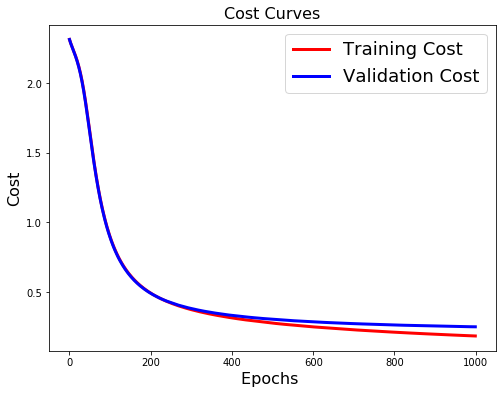

In [28]:
plot_history('loss')

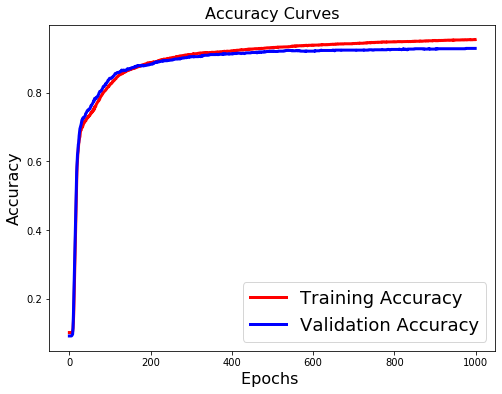

In [29]:
 plot_history('accuracy')

### 6. q&a

#### 1. Как были инициализированы весовые коэффициенты и влияют ли их начальные знаичения на результат обучения?

Весовые коэффициенты инициализированы случайными значениями близкими к нулю.

#### 2. Как влияют параметры обучения на результат?

С увеличением количества обновления весов за счет увеличения количества эпох и изменения `batch_size` получаем немного лучший результат, но увеличивается время выполнения тренировки модели.

#### 3. Как зависит функция потерь от количества итераций?

Функция потерь уменьшается с увеличением количества итераций

#### 4. Каковы достигнутые полнота и точность классификации / распознавания или какова ошибка прогнозирования?

In [33]:
print(f'Accuracy:\t{test_acc*100:.2f}%\nCost:\t\t{test_cost:.2f}')

Accuracy:	92.90%
Cost:		0.25


### Список Источников

1. Оф. сайт `Python`. — Электронный ресурс. — Режим доступа: https://www.python.org/ — Дата доступа: 27.11.2019.
2. Оф. сайт `Scikit-learn`. — Электронный ресурс. — Режим доступа: https://scikit-learn.org/ — Дата доступа: 27.11.2019.
3. Документация библиотеки `Keras`. — Электронный ресурс. — Режим доступа: https://keras.io/ — Дата доступа: 27.11.2019.
4. Документация библиотеки для построения графиков `Matplotlib`. — Электронный ресурс. — Режим доступа: https://matplotlib.org/ — Дата доступа: 27.11.2019.